In [37]:
import os
if not os.path.exists('data'):
    os.makedirs('data')


In [38]:
import pandas as pd
import os

# Datos manuales extraídos de FBref y WhoScored
data = {
    "Equipo": ["Inter", "Napoli", "Atalanta", "Juventus", "Roma", "Fiorentina", "Lazio", "AC Milan", "Bologna", "Como",
               "Torino", "Udinese", "Genoa", "Verona", "Cagliari", "Parma", "Lecce", "Empoli", "Venezia", "Monza"],
    "Goles": [79, 59, 78, 58, 56, 60, 61, 61, 57, 49, 39, 41, 37, 34, 40, 44, 27, 33, 32, 28],
    "Goles_Contra": [35, 27, 37, 35, 35, 41, 49, 43, 47, 52, 45, 56, 49, 66, 56, 58, 58, 59, 56, 69],
    "Posesion": [57.6, 53.5, 53.8, 55.7, None, None, 54.0, None, 56.0, None, None, None, None, None, None, None, None, None, None, None],
    "Pases_Precisos": [88.1, 86.5, None, 88.1, None, None, 86.8, 87.7, None, None, None, None, None, None, None, None, None, None, None, None]
}

df = pd.DataFrame(data)

# Create the directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

df.to_csv("data/serie_a_2024.csv", index=False)
print("Datos guardados correctamente.")

Datos guardados correctamente.


In [39]:
df = pd.read_csv("data/serie_a_2024.csv")
import pandas as pd
import os

# Crear carpeta si no existe
if not os.path.exists("data"):
    os.makedirs("data")

# Datos de ejemplo
data = {
    "Equipo": ["Inter", "Napoli", "Atalanta", "Juventus", "Roma"],
    "Goles": [79, 59, 78, 58, 56],
    "Goles_Contra": [35, 27, 37, 35, 35],
    "Posesion": [57.6, 53.5, 53.8, 55.7, None],
    "Pases_Precisos": [88.1, 86.5, None, 88.1, None]
}

df = pd.DataFrame(data)
df.to_csv("data/serie_a_2024.csv", index=False)
print("Archivo creado correctamente.")


Archivo creado correctamente.


In [40]:
df = pd.read_csv("data/serie_a_2024.csv")
df.head()


,Equipo,Goles,Goles_Contra,Posesion,Pases_Precisos
0,Inter,79,35,57.6,88.1
1,Napoli,59,27,53.5,86.5
2,Atalanta,78,37,53.8,NaN
3,Juventus,58,35,55.7,88.1
4,Roma,56,35,NaN,NaN


In [41]:
import os

# Verifica si el archivo existe
print("Archivo existe:", os.path.exists("data/serie_a_2024.csv"))


Archivo existe: True


In [42]:
import pandas as pd
import os

# Crear carpeta si no existe
if not os.path.exists("data"):
    os.makedirs("data")

# Datos de ejemplo
data = {
    "Equipo": ["Inter", "Napoli", "Atalanta", "Juventus", "Roma"],
    "Goles": [79, 59, 78, 58, 56],
    "Goles_Contra": [35, 27, 37, 35, 35],
    "Posesion": [57.6, 53.5, 53.8, 55.7, None],
    "Pases_Precisos": [88.1, 86.5, None, 88.1, None]
}

df = pd.DataFrame(data)
df.to_csv("data/serie_a_2024.csv", index=False)
print("Archivo creado correctamente.")


Archivo creado correctamente.


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


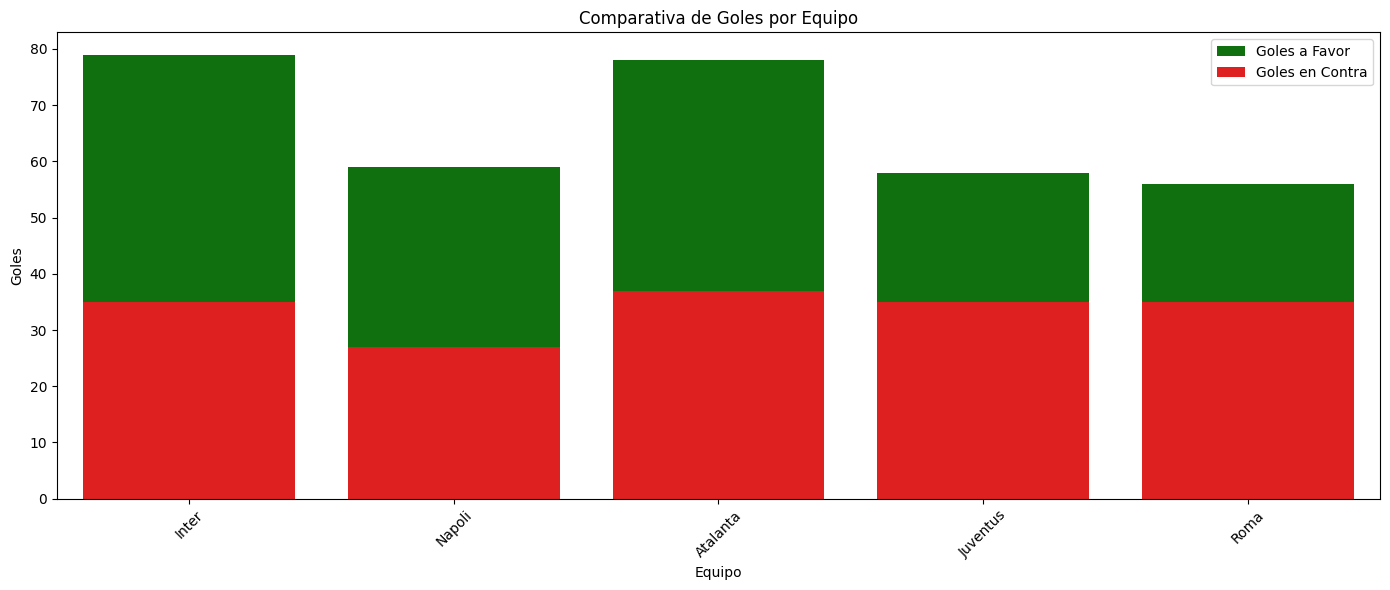

In [44]:
plt.figure(figsize=(14,6))
sns.barplot(x="Equipo", y="Goles", data=df, color="green", label="Goles a Favor")
sns.barplot(x="Equipo", y="Goles_Contra", data=df, color="red", label="Goles en Contra")
plt.xticks(rotation=45)
plt.title("Comparativa de Goles por Equipo")
plt.legend()
plt.tight_layout()
plt.show()


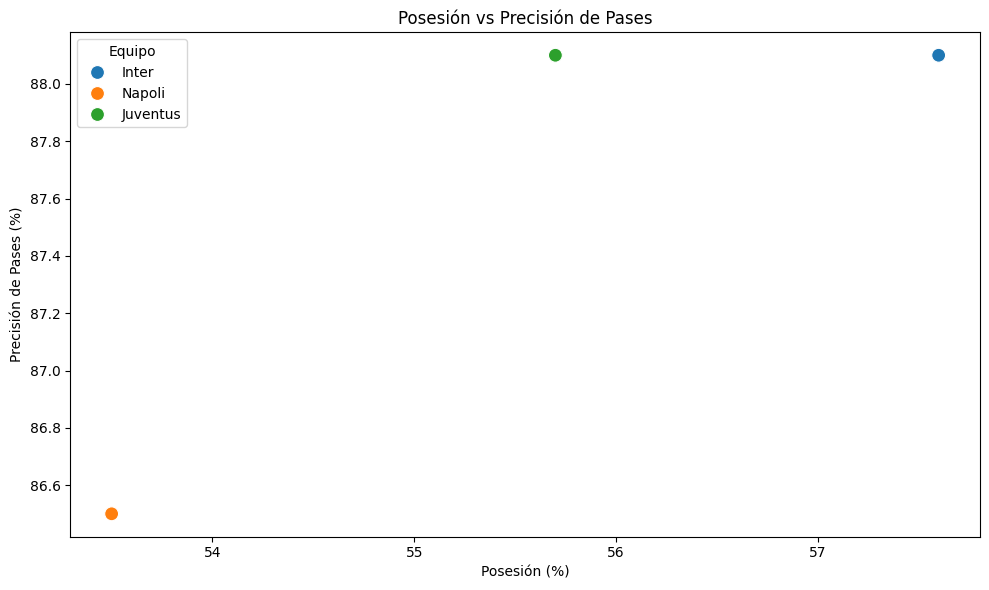

In [45]:
df_pos_pases = df.dropna(subset=["Posesion", "Pases_Precisos"])

plt.figure(figsize=(10,6))
sns.scatterplot(x="Posesion", y="Pases_Precisos", hue="Equipo", data=df_pos_pases, s=100)
plt.title("Posesión vs Precisión de Pases")
plt.xlabel("Posesión (%)")
plt.ylabel("Precisión de Pases (%)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4293494091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Goles", y="Equipo", data=top_goleadores, palette="viridis")


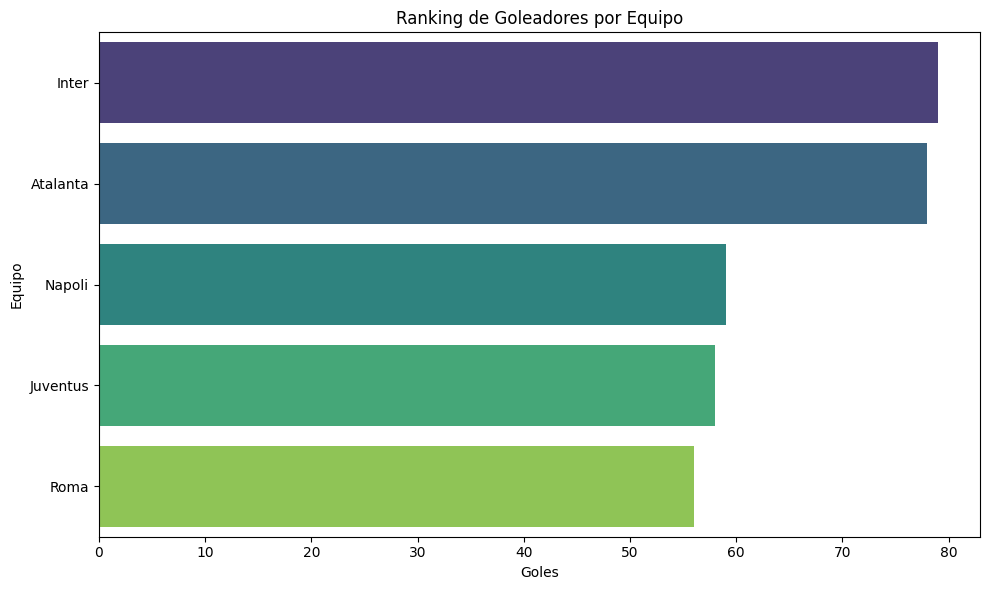

In [46]:
top_goleadores = df.sort_values(by="Goles", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Goles", y="Equipo", data=top_goleadores, palette="viridis")
plt.title("Ranking de Goleadores por Equipo")
plt.tight_layout()
plt.show()


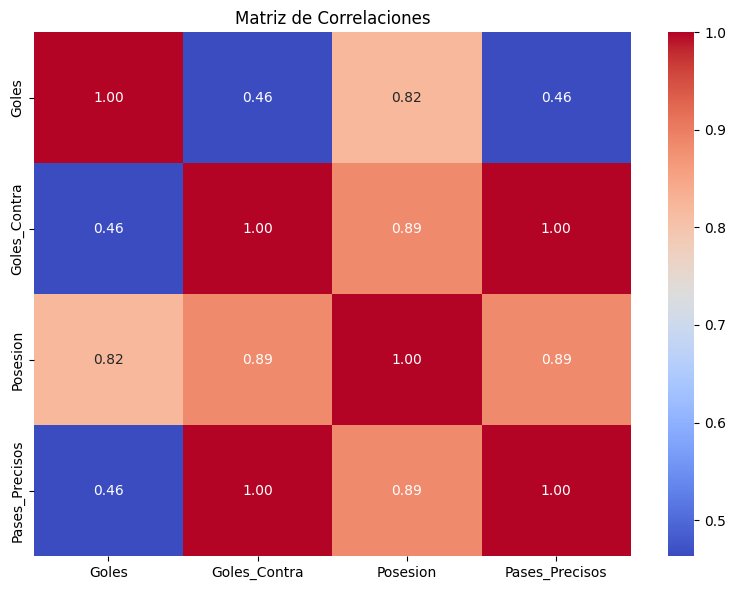

In [47]:
# Filtrar columnas numéricas
df_numerico = df[["Goles", "Goles_Contra", "Posesion", "Pases_Precisos"]]

# Eliminar filas con valores nulos
df_numerico = df_numerico.dropna()

# Matriz de correlación
correlaciones = df_numerico.corr()

# Visualización
plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.tight_layout()
plt.show()


In [48]:
# Crear columna de diferencia de goles
df["Diferencia_Goles"] = df["Goles"] - df["Goles_Contra"]

# Tabla resumen
resumen = df[["Equipo", "Goles", "Goles_Contra", "Diferencia_Goles", "Posesion", "Pases_Precisos"]]
resumen.sort_values(by="Diferencia_Goles", ascending=False).head(10)



,Equipo,Goles,Goles_Contra,Diferencia_Goles,Posesion,Pases_Precisos
0,Inter,79,35,44,57.6,88.1
2,Atalanta,78,37,41,53.8,NaN
1,Napoli,59,27,32,53.5,86.5
3,Juventus,58,35,23,55.7,88.1
4,Roma,56,35,21,NaN,NaN


In [49]:
# Resetear el índice para que sea limpio y ordenado
resumen = resumen.reset_index(drop=True)

# Mostrar la tabla ordenada por diferencia de goles
resumen.sort_values(by="Diferencia_Goles", ascending=False).head(10)


,Equipo,Goles,Goles_Contra,Diferencia_Goles,Posesion,Pases_Precisos
0,Inter,79,35,44,57.6,88.1
2,Atalanta,78,37,41,53.8,NaN
1,Napoli,59,27,32,53.5,86.5
3,Juventus,58,35,23,55.7,88.1
4,Roma,56,35,21,NaN,NaN


In [50]:
# Reemplazar NaN por la media en columnas numéricas
df["Posesion"].fillna(df["Posesion"].mean(), inplace=True)
df["Pases_Precisos"].fillna(df["Pases_Precisos"].mean(), inplace=True)


/tmp/ipython-input-2414309882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Posesion"].fillna(df["Posesion"].mean(), inplace=True)
/tmp/ipython-input-2414309882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [51]:
df.fillna(0, inplace=True)


In [52]:
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Equipo              0
Goles               0
Goles_Contra        0
Posesion            0
Pases_Precisos      0
Diferencia_Goles    0
dtype: int64


In [53]:
df.to_csv("data/serie_a_2024_procesado.csv", index=False)
print("Datos procesados guardados correctamente.")


Datos procesados guardados correctamente.


In [54]:
# Crear nuevas métricas
df["Eficiencia_Ofensiva"] = df["Goles"] / df["Pases_Precisos"]
df["Eficiencia_Defensiva"] = df["Goles_Contra"] / df["Posesion"]
df["Potencial_Puntos"] = df["Diferencia_Goles"] + df["Posesion"] * 0.2 + df["Pases_Precisos"] * 0.3


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Variable objetivo (simulada para este ejemplo)
df["Puntos_2024"] = df["Potencial_Puntos"] + (df["Diferencia_Goles"] * 0.5)

# Variables predictoras
X = df[["Goles", "Goles_Contra", "Posesion", "Pases_Precisos", "Eficiencia_Ofensiva", "Eficiencia_Defensiva"]]
y = df["Puntos_2024"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
df["Puntos_Predichos_2025"] = modelo.predict(X)

# Ranking proyectado
df_prediccion = df[["Equipo", "Puntos_Predichos_2025"]].sort_values(by="Puntos_Predichos_2025", ascending=False)
df_prediccion.reset_index(drop=True, inplace=True)
df_prediccion.index += 1  # Posiciones en tabla
df_prediccion.head(10)


,Equipo,Puntos_Predichos_2025
1,Inter,103.950000
2,Atalanta,98.530000
3,Napoli,75.642808
4,Juventus,72.070000
5,Roma,68.800000


/tmp/ipython-input-1126220878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Puntos_Predichos_2025", y="Equipo", data=df_prediccion, palette="mako")


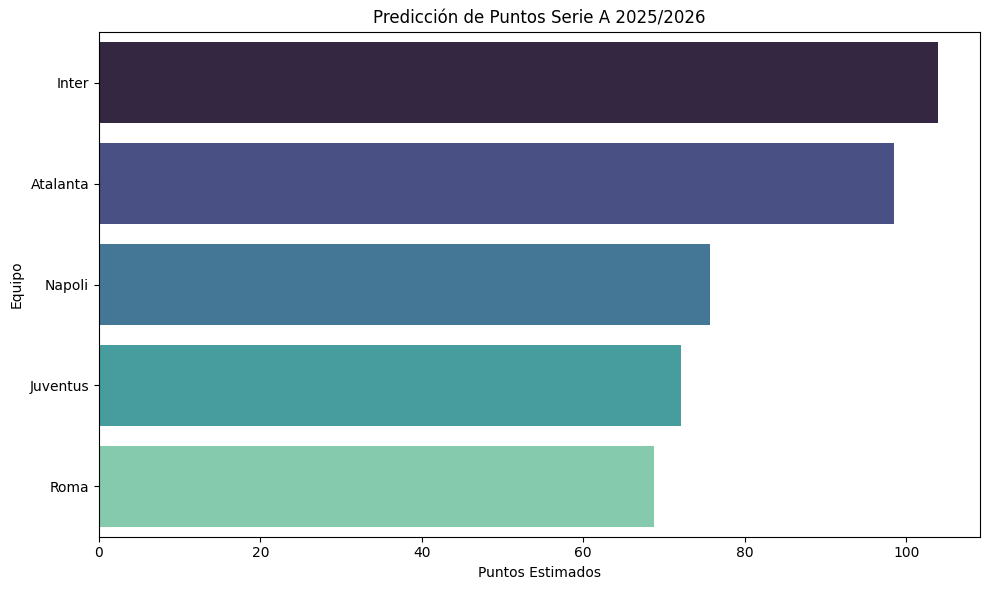

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x="Puntos_Predichos_2025", y="Equipo", data=df_prediccion, palette="mako")
plt.title("Predicción de Puntos Serie A 2025/2026")
plt.xlabel("Puntos Estimados")
plt.tight_layout()
plt.show()


In [57]:
df.to_csv("data/prediccion_serie_a_2025.csv", index=False)
print("Predicción guardada correctamente.")


Predicción guardada correctamente.


In [58]:
import os

# Mostrar archivos en la carpeta 'data'
print("Archivos en carpeta 'data':", os.listdir("data"))


Archivos en carpeta 'data': ['prediccion_serie_a_2025.csv', 'serie_a_2024.csv', 'serie_a_2024_procesado.csv']


import os

# Mostrar archivos en la carpeta 'data'
print("Archivos en carpeta 'data':", os.listdir("data"))


In [59]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import os
import pandas as pd
import shutil
from google.colab import drive

# Montar Drive
drive.mount('/content/drive')

# Crear carpeta si no existe
if not os.path.exists("data"):
    os.makedirs("data")

# Simular predicción si no existe df_prediccion
try:
    df_prediccion
except NameError:
    # Si no existe, crear un ejemplo básico
    df_prediccion = pd.DataFrame({
        "Equipo": ["Inter", "Napoli", "Juventus"],
        "Puntos_Predichos_2025": [85.2, 78.4, 74.1]
    })

# Guardar archivo
df_prediccion.to_csv("data/prediccion_serie_a_2025.csv", index=False)
print("Archivo guardado correctamente.")

# Copiar a Drive
shutil.copy("data/prediccion_serie_a_2025.csv", "/content/drive/MyDrive/prediccion_serie_a_2025.csv")
print("Archivo copiado a Drive correctamente.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo guardado correctamente.
Archivo copiado a Drive correctamente.


In [61]:
import shutil
shutil.copy("data/prediccion_serie_a_2025.csv", "/content/drive/MyDrive/prediccion_serie_a_2025.csv")
print("Archivo copiado a Drive correctamente.")


Archivo copiado a Drive correctamente.


In [62]:
%%writefile app.py
import streamlit as st

st.title("Predicción Serie A 2025")
st.write("Bienvenido al dashboard de análisis y predicción.")


Overwriting app.py


In [63]:
!streamlit run app.py --server.port=8501 &>/dev/null &


In [64]:
!pip install pyngrok


  Using cached pyngrok-7.3.0-py3-none-any.whl.metadata (8.1 kB)
Using cached pyngrok-7.3.0-py3-none-any.whl (25 kB)


In [98]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Predicción Serie A 2025", layout="wide")
st.title("⚽ Predicción Serie A 2025")
st.write("Bienvenido al dashboard de análisis y predicción.")

# Cargar datos
df_pred = pd.read_csv("data/prediccion_serie_a_2025.csv")
df_extra = pd.read_csv("data/serie_a_2024_procesado.csv")

# Clasificación proyectada
df_pred["Clasificación"] = df_pred["Puntos_Predichos_2025"].rank(ascending=False, method="min").astype(int)
df_pred.sort_values("Clasificación", inplace=True)

# Zonas de tabla
def zona_tabla(pos):
    if pos <= 4:
        return "Champions League"
    elif pos <= 6:
        return "Europa League"
    elif pos >= 18:
        return "Descenso"
    else:
        return "Media Tabla"

df_pred["Zona"] = df_pred["Clasificación"].apply(zona_tabla)

# Filtros
zona_seleccionada = st.sidebar.selectbox("📌 Filtrar por zona de tabla", ["Todas"] + df_pred["Zona"].unique().tolist())
equipo_seleccionado = st.sidebar.selectbox("🔍 Selecciona un equipo", ["Todos"] + df_pred["Equipo"].tolist())

# Aplicar filtros
df_vista = df_pred.copy()
if zona_seleccionada != "Todas":
    df_vista = df_vista[df_vista["Zona"] == zona_seleccionada]
if equipo_seleccionado != "Todos":
    df_vista = df_vista[df_vista["Equipo"] == equipo_seleccionado]

# Mostrar tabla
st.subheader("📋 Tabla de Predicción")
st.dataframe(df_vista.style.format({"Puntos_Predichos_2025": "{:.2f}"}))

# Ranking visual
if equipo_seleccionado == "Todos":
    st.subheader("📈 Ranking de Equipos por Puntos Estimados")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x="Puntos_Predichos_2025", y="Equipo", data=df_vista, hue="Zona", dodge=False, palette="Set2", ax=ax)
    ax.set_title("Predicción de Puntos Serie A 2025/2026")
    ax.set_xlabel("Puntos Estimados")
    st.pyplot(fig)

# Panel individual
if equipo_seleccionado != "Todos":
    st.subheader(f"📊 Panel del equipo: {equipo_seleccionado}")
    equipo_data = df_extra[df_extra["Equipo"] == equipo_seleccionado].iloc[0]
    st.metric("Goles", equipo_data["Goles"])
    st.metric("Goles en Contra", equipo_data["Goles_Contra"])
    st.metric("Eficiencia Ofensiva", f"{equipo_data['Eficiencia_Ofensiva']:.2f}")
    st.metric("Eficiencia Defensiva", f"{equipo_data['Eficiencia_Defensiva']:.2f}")
    st.metric("Posesión", f"{equipo_data['Posesion']:.1f}%")
    st.metric("Pases Precisos", f"{equipo_data['Pases_Precisos']:.1f}%")

# 📊 Matriz de Correlaciones con verificación de columnas
st.subheader("📊 Matriz de Correlaciones")

# Crear métricas si no existen
if "Eficiencia_Ofensiva" not in df_extra.columns:
    if "Goles" in df_extra.columns and "Pases_Precisos" in df_extra.columns:
        df_extra["Eficiencia_Ofensiva"] = df_extra["Goles"] / df_extra["Pases_Precisos"]

if "Eficiencia_Defensiva" not in df_extra.columns:
    if "Goles_Contra" in df_extra.columns and "Posesion" in df_extra.columns:
        df_extra["Eficiencia_Defensiva"] = df_extra["Goles_Contra"] / df_extra["Posesion"]

# Lista de columnas esperadas
columnas_deseadas = [
    "Goles", "Goles_Contra", "Posicion",
    "Eficiencia_Ofensiva", "Eficiencia_Defensiva",
    "Posesion", "Pases_Precisos"
]

# Filtrar columnas disponibles
columnas_disponibles = [col for col in columnas_deseadas if col in df_extra.columns]

# ⚠️ Avisar si faltan columnas
faltantes = [col for col in columnas_deseadas if col not in df_extra.columns]
if faltantes:
    print(f"⚠️ Columnas no disponibles para la matriz: {faltantes}")

# Calcular matriz de correlación
df_corr = df_extra[columnas_disponibles].dropna()
corr = df_corr.corr()

# Visualizar
fig3, ax3 = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax3)
st.pyplot(fig3)


Overwriting app.py


In [73]:

!streamlit run app.py --server.port=8501 &>/dev/null &


In [88]:
!pip install streamlit


In [100]:
from pyngrok import conf, ngrok

# Configura el token de autenticación
conf.get_default().auth_token = "31sfPcG8l2Q7fDRj68OLpJXutE5_2dkd8E3pvGw4KLKxjTvCL"

# Cierra túneles previos
ngrok.kill()

# Abre el túnel correctamente
public_url = ngrok.connect(addr="http://localhost:8501", proto="http")
print(f"🔗 Abre tu dashboard aquí: {public_url}")


🔗 Abre tu dashboard aquí: NgrokTunnel: "https://e52402835cd5.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.180.156:8501

⚠️ Columnas no disponibles para la matriz: ['Posicion']
